<a href="https://colab.research.google.com/github/mainadwitiya/Daily_usage_codes/blob/main/plant_disease_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Mon May  3 05:51:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Final_dataset.zip

In [5]:
import math, json, os, sys

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.layers import (Activation, BatchNormalization, Conv2D, Dense,
                          Dropout, Flatten, MaxPooling2D)
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator



In [21]:

DATA_DIR = 'Final_dataset'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
VALID_DIR = os.path.join(DATA_DIR, 'validate')
TEST_DIR = os.path.join(DATA_DIR, 'test')
SIZE = (256, 256)
BATCH_SIZE = 64
HEIGHT = 256
WIDTH  = 256
DEPTH   = 3
batch_size = 32

In [17]:
# # train_datagen = ImageDataGenerator(
# #     rescale = 1./255,
# #     validation_split=0
# # )

# # Training
# train_generator = train_datagen.flow_from_directory(
#     TRAIN_DIR,
#     target_size = (IMG_HEIGHT, IMG_WIDTH),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=batch_size,
#     shuffle=True,
#     subset='training'
# )

# # Validation
# validation_generator = train_datagen.flow_from_directory(
#     VALID_DIR,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=batch_size,
#     subset='validation'
# )

# # Evaluation
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     TEST_DIR,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     color_mode='rgb',
#     class_mode='categorical',
#     batch_size=batch_size
# )

Found 30400 images belonging to 38 classes.
Found 0 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.


In [15]:
 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    # validation_split=0.15
)

# Training
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    subset='training'
)

# Validation
val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    subset='training'
)

# Evaluation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size
)

Found 30400 images belonging to 38 classes.
Found 5700 images belonging to 38 classes.
Found 1900 images belonging to 38 classes.


In [23]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [25]:

model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_15 (Activation)   (None, 85, 85, 64)       

In [17]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
lr_redux = ReduceLROnPlateau(monitor='val_loss',
                            patience = 3, verbose = 1,
                            factor = 0.1, min_lr = 0.000001)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')


log_dir = f"/content/gdrive/MyDrive/custom_plant_model{int(time.time())}"

tensorboard = TensorBoard(log_dir=log_dir)
callbacks = [early_stop, lr_redux, tensorboard]

In [ ]:

# Fit model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
)
model.save('plant_main.h5')

In [26]:
EPOCHS = 50

LR = 1e-3
opt = Adam(lr=LR, decay=LR / EPOCHS)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# Compile model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
callbacks = [early_stop, tensorboard]
# Train model
print("[INFO] Training network...")
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=EPOCHS,callbacks=callbacks, 
                              verbose=1)
model.save('plant_main.h5')

[INFO] Training network...
Epoch 1/50
950/950 [==============================] - 90s 93ms/step - loss: 0.2580 - accuracy: 0.3049 - val_loss: 0.0604 - val_accuracy: 0.6258
Epoch 2/50
950/950 [==============================] - 86s 91ms/step - loss: 0.0441 - accuracy: 0.7584 - val_loss: 0.0444 - val_accuracy: 0.7395
Epoch 3/50
950/950 [==============================] - 85s 89ms/step - loss: 0.0305 - accuracy: 0.8416 - val_loss: 0.0321 - val_accuracy: 0.7937
Epoch 4/50
950/950 [==============================] - 84s 88ms/step - loss: 0.0216 - accuracy: 0.8913 - val_loss: 0.0288 - val_accuracy: 0.8447
Epoch 5/50
950/950 [==============================] - 85s 90ms/step - loss: 0.0165 - accuracy: 0.9245 - val_loss: 0.0270 - val_accuracy: 0.8500
Epoch 6/50
950/950 [==============================] - 86s 90ms/step - loss: 0.0139 - accuracy: 0.9400 - val_loss: 0.0273 - val_accuracy: 0.8365
Epoch 7/50
950/950 [==============================] - 86s 90ms/step - loss: 0.0100 - accuracy: 0.9597 - val_l

In [27]:
model.history.history

{'accuracy': [0.4850328862667084,
  0.7701644897460938,
  0.8517434000968933,
  0.8929605484008789,
  0.9149671196937561,
  0.941315770149231,
  0.9589802622795105,
  0.9497697353363037,
  0.9741118550300598,
  0.9833223819732666,
  0.9833552837371826,
  0.9879934191703796,
  0.9909210801124573,
  0.9919407963752747,
  0.9934210777282715,
  0.9945394992828369,
  0.9917762875556946,
  0.9957894682884216,
  0.9970065951347351,
  0.9970394968986511,
  0.9980592131614685,
  0.9963157773017883,
  0.9976644515991211,
  0.996019721031189,
  0.9976973533630371],
 'loss': [0.12309224158525467,
  0.04149888455867767,
  0.028696205466985703,
  0.02122095786035061,
  0.017791524529457092,
  0.013502254150807858,
  0.010141939856112003,
  0.012150313705205917,
  0.0072039393708109856,
  0.005368698853999376,
  0.005303340032696724,
  0.0042796144261956215,
  0.0034496765583753586,
  0.003234391799196601,
  0.002852365607395768,
  0.0025071746204048395,
  0.0032522003166377544,
  0.00206282548606395

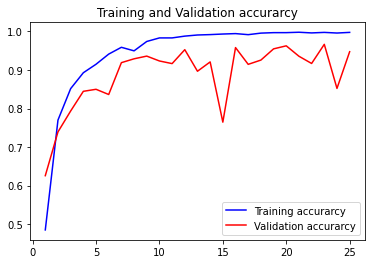

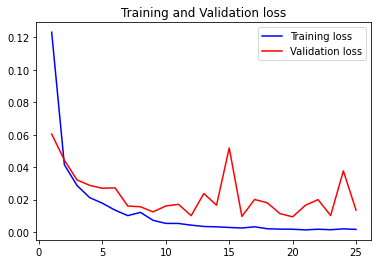

In [29]:
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()